In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
dataset_train = pd.read_csv('E:\To Do - 10 days\Minor\Google_Stock_Price_Train.csv')
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [4]:
# Feature Scaling
train = dataset_train.loc[:, ["Open"]].values
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))
train_scaled = scaler.fit_transform(train)
train_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

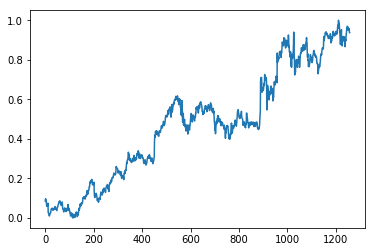

In [5]:
plt.plot(train_scaled)
plt.show()

In [6]:
# Creating a data structure with 50 timesteps and 1 output
X_train = []
y_train = []
timesteps = 50
for i in range(timesteps, 1257):
    X_train.append(train_scaled[i-timesteps:i, 0])
    y_train.append(train_scaled[i+1, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train

array([[0.08581368, 0.09701243, 0.09433366, ..., 0.03675869, 0.04486941,
        0.05065481],
       [0.09701243, 0.09433366, 0.09156187, ..., 0.04486941, 0.05065481,
        0.05214302],
       [0.09433366, 0.09156187, 0.07984225, ..., 0.05065481, 0.05214302,
        0.05612397],
       ...,
       [0.93483518, 0.9313937 , 0.94636878, ..., 0.96123223, 0.95475854,
        0.95204256],
       [0.9313937 , 0.94636878, 0.96569685, ..., 0.95475854, 0.95204256,
        0.95163331],
       [0.94636878, 0.96569685, 0.97510976, ..., 0.95204256, 0.95163331,
        0.95725128]])

In [7]:
# Reshaping
#X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape
X_train[0:1]

array([[0.08581368, 0.09701243, 0.09433366, 0.09156187, 0.07984225,
        0.0643277 , 0.0585423 , 0.06568569, 0.06109085, 0.06639259,
        0.0614257 , 0.07474514, 0.02797827, 0.02379269, 0.02409033,
        0.0159238 , 0.01078949, 0.00967334, 0.01642607, 0.02100231,
        0.02280676, 0.02273235, 0.02810849, 0.03212665, 0.0433812 ,
        0.04475779, 0.04790163, 0.0440695 , 0.04648783, 0.04745517,
        0.04873875, 0.03936305, 0.04137213, 0.04034898, 0.04784582,
        0.04325099, 0.04356723, 0.04286033, 0.04602277, 0.05398467,
        0.05738894, 0.05714711, 0.05569611, 0.04421832, 0.04514845,
        0.04605997, 0.04412531, 0.03675869, 0.04486941, 0.05065481]])

In [8]:
y_train[0:1]

array([0.05612397])

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

[0.54460322 0.45446034 0.39575164 0.49957509 0.53759902 0.51540449
 0.61485625 0.83002774 0.78412851 0.42811699]
[0.49423729 0.51186441 0.49864407 0.51457627 0.61542373 0.87762712
 0.94491525 0.61779661 0.34830508 0.15779661]
0.05709019258793625


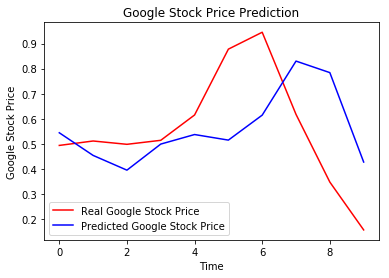

In [10]:
dataset_test = pd.read_csv(r"E:\To Do - 10 days\Minor\Google_Stock_Price_Test.csv")
inputs=dataset_test.loc[:,["Open"]].values
inputs=scaler.fit_transform(inputs)
X=[]
real_stock_price=[]
for i in range(timesteps, 60):
    X.append(inputs[i-timesteps:i, 0])
    real_stock_price.append(inputs[i+1,0])
X_test=np.array(X)
real_stock_price=np.array(real_stock_price)
#X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price=reg.predict(X_test)
predicted_stock_price=np.array(predicted_stock_price)
print(predicted_stock_price)
#predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

# Visualising the results
print(real_stock_price)
print(mean_squared_error(real_stock_price,predicted_stock_price))
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

[0.52812709 0.42875214 0.53203363 0.52053724 0.53203363 0.46872907
 0.63639408 0.87249795 0.82537763 0.66917181]
[0.49423729 0.51186441 0.49864407 0.51457627 0.61542373 0.87762712
 0.94491525 0.61779661 0.34830508 0.15779661]
0.08325189899053427


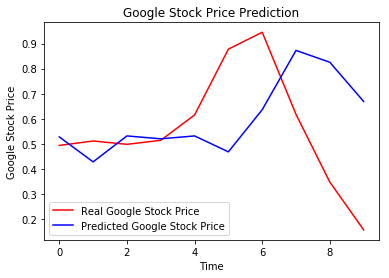

In [11]:
from sklearn.tree import DecisionTreeRegressor
dtreg = DecisionTreeRegressor(random_state=0)
dtreg.fit(X_train, y_train)
pred=dtreg.predict(X_test)
print(pred)
print(real_stock_price)
print(mean_squared_error(real_stock_price,pred))
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(pred, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

[0.51140235 0.51140235 0.51140235 0.51140235 0.51140235 0.51140235
 0.5341051  0.77275736 0.82359439 0.59086763]
[0.49423729 0.51186441 0.49864407 0.51457627 0.61542373 0.87762712
 0.94491525 0.61779661 0.34830508 0.15779661]
0.07516369807755874


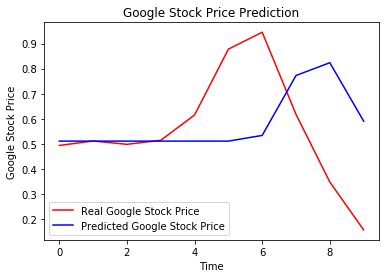

In [12]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=2, random_state=0, n_estimators=100)
regr.fit(X_train, y_train)
predi=regr.predict(X_test)
print(predi)
print(real_stock_price)
print(mean_squared_error(real_stock_price,predi))
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predi, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

C:\Users\Dell\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
train = pd.read_csv('E:\To Do - 10 days\Minor\Google_Stock_Price_Train.csv')

In [3]:
train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [4]:
training_set=train.iloc[:,1:2].values
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [5]:
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [6]:
training_set_scaled.shape

(1258, 1)

In [7]:
X_train=[]
y_train=[]
for i in range(60,1258):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [8]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [9]:
X_train.shape

(1198, 60, 1)

In [10]:
regressor=Sequential()

In [11]:
regressor.add(LSTM(units=100,return_sequences=True,input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.4))

In [12]:
regressor.add(LSTM(units=100,return_sequences=True))
regressor.add(Dropout(0.6))

In [13]:
regressor.add(LSTM(units=100,return_sequences=True))
regressor.add(Dropout(0.6))

In [14]:
regressor.add(LSTM(units=100))
regressor.add(Dropout(0.4))

In [15]:
regressor.add(Dense(units=1))

In [16]:
regressor.compile(optimizer='adam',loss='mean_squared_error')

In [ ]:
regressor.fit(X_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
1198/1198 [==============================] - 26s 22ms/step - loss: 0.0454
Epoch 2/100
1198/1198 [==============================] - 15s 12ms/step - loss: 0.0087
Epoch 3/100
1198/1198 [==============================] - 14s 12ms/step - loss: 0.0073
Epoch 4/100
1198/1198 [==============================] - 14s 12ms/step - loss: 0.0055
Epoch 5/100
1198/1198 [==============================] - 15s 12ms/step - loss: 0.0063
Epoch 6/100
1198/1198 [==============================] - 15s 12ms/step - loss: 0.0070
Epoch 7/100
1198/1198 [==============================] - 15s 13ms/step - loss: 0.0064
Epoch 8/100
1198/1198 [==============================] - 15s 13ms/step - loss: 0.0053
Epoch 9/100
1198/1198 [==============================] - 15s 12ms/step - loss: 0.0055
Epoch 10/100
1198/1198 [==============================] - 14s 12ms/step - loss: 0.0053
Epoch 11/100
1198/1198 [==============================] - 15s 13ms/step - loss: 0.0055
Epoch 12/100
1198/1198 [============================

In [ ]:
test = pd.read_csv('E:\To Do - 10 days\Minor\Google_Stock_Price_Test.csv')
real_stock_price = test.iloc[:, 1:2].values
total_data=pd.concat([train['Open'],test['Open']],axis=0)

In [ ]:
inputs=total_data[len(train)-len(test)-60:].values
inputs=inputs.reshape(-1,1)
inputs = sc.transform(inputs)

In [ ]:
X_test=[]
for i in range(60,80):
    X_test.append(inputs[i-60:i,0])
X_test=np.array(X_test)
X_test.shape
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [ ]:
predicted_stock_price=regressor.predict(X_test)
predicted_stock_price=sc.inverse_transform(predicted_stock_price)

In [ ]:
#Visualization
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(predicted_stock_price,color='red',label='Predicted Stock Price')
plt.plot(real_stock_price,color='blue',label='Real Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

MAE = mean_absolute_error(real_stock_price, regressor.predict(X_test))